In [10]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

data_path = 'IGRData/IGR230510_IGR230503'
df = pd.read_csv(f'{data_path}/stat_df.csv')

include_people = ['yangjianyu', np.nan]
df=df[df['people'].isin(include_people)]

df['people'] = 'yangjianyu'
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

pdf["Route type"] = pdf["route"]
pdf["trip"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]
# route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
# train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
# for route in route_type_dict:
#     pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
# for route in train_type_dict:
#     pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.groupby('phone').mean(numeric_only=True))
df.groupby('phone').mean(numeric_only=True).to_csv(f'{data_path}/all_info.csv')

              err_x     err_y      err_h      gt_x      gt_y    length
phone                                                                 
Mate30_2   0.036460  0.135111  26.879222  0.025820  0.095191  1.196221
Nova9pro   0.138044 -0.133637  15.277180  0.024326  0.111583  1.091952
Oneplus9r -0.099733  0.116372  14.988083  0.023552  0.131522  1.237161


In [12]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('people')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info_bytype.csv')

des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/error_info_byphone.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
des.to_csv(f'{data_path}/length_info.csv')

             count       mean        std       min       20%       25%        50%        75%        80%        90%         max
people                                                                                                                        
yangjianyu  8904.0  19.229753  15.226594  0.081928  7.980207  9.236392  15.264755  24.730727  27.922034  37.785483  196.794201
                    count       mean        std       min       20%        25%        50%        75%        80%        90%         max
Route type                                                                                                                            
Around_55          1558.0  19.496629  16.456419  0.421886  7.612287   9.116346  15.302131  24.660046  27.516216  38.797589  180.314144
Around_Lib         1641.0  21.637552  16.379341  0.256957  9.621917  10.960842  17.554808  28.105708  31.378607  41.008506  196.794201
Around_Playground  1557.0  17.547851  13.980007  0.303612  7.570511   8.693375 

In [4]:
# pdf.columns
item_index = pdf.columns.to_list().index('Train type')
print(pdf.columns.to_list())

# train_pdf = pdf.loc[pdf['Train type']=='train']
# des = train_pdf.groupby('Device')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
# print(des)

['Noise east (cm)', 'Noise north (cm)', 'err_h', 'gt_x', 'gt_y', 'Device', 'trip', 'length', 'Route type', 'Train type']


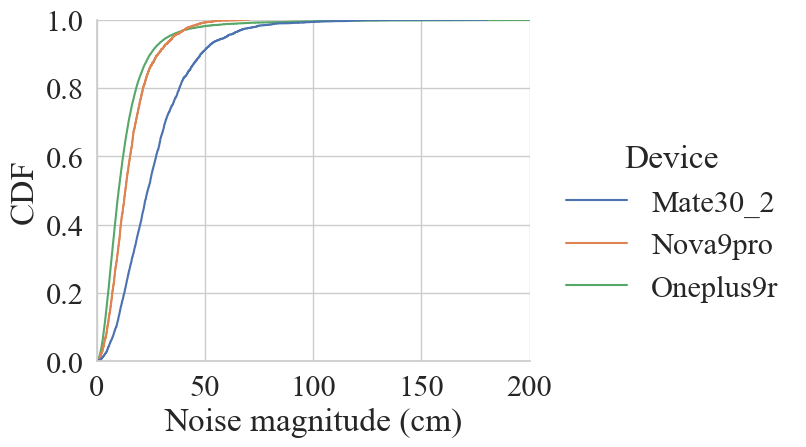

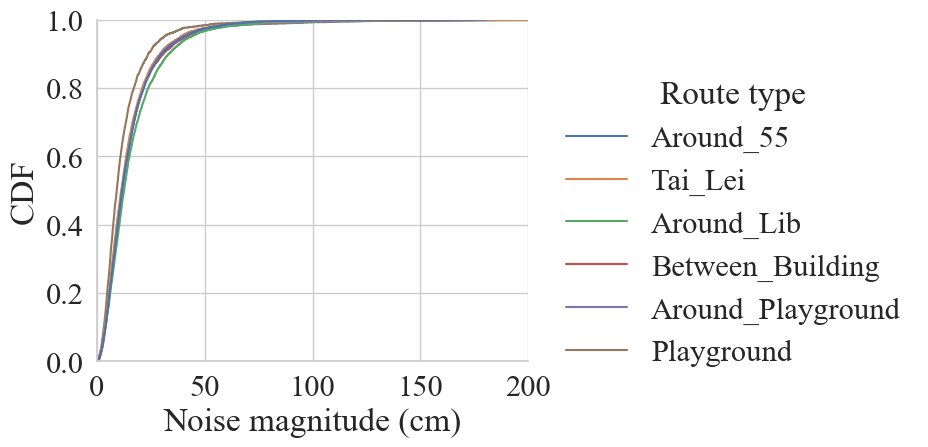

In [7]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

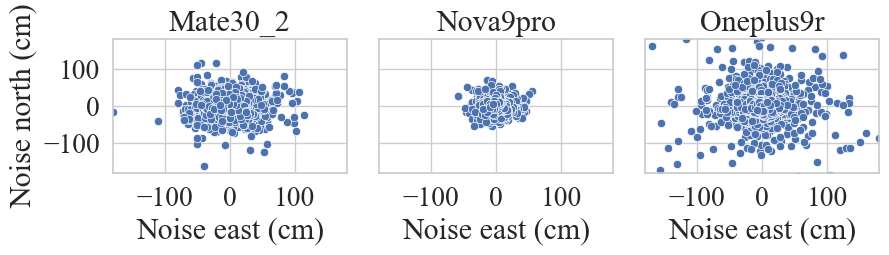

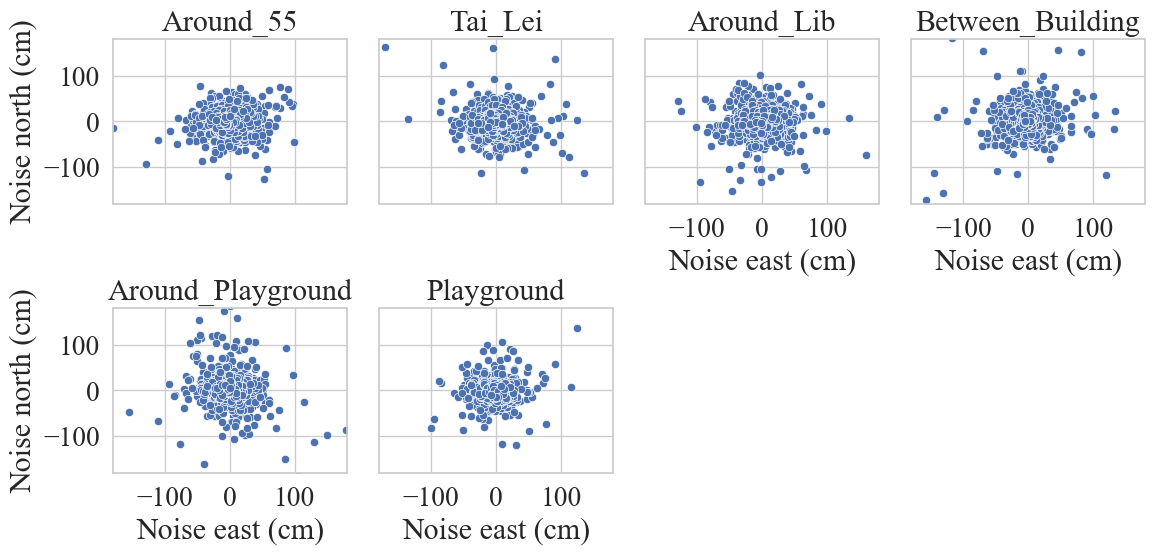

In [8]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
# g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

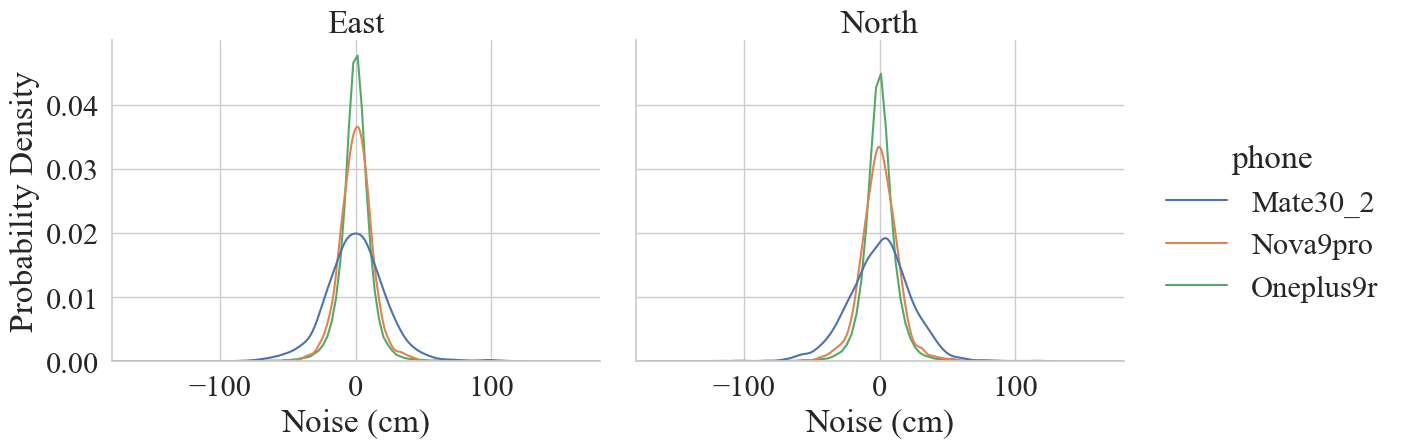

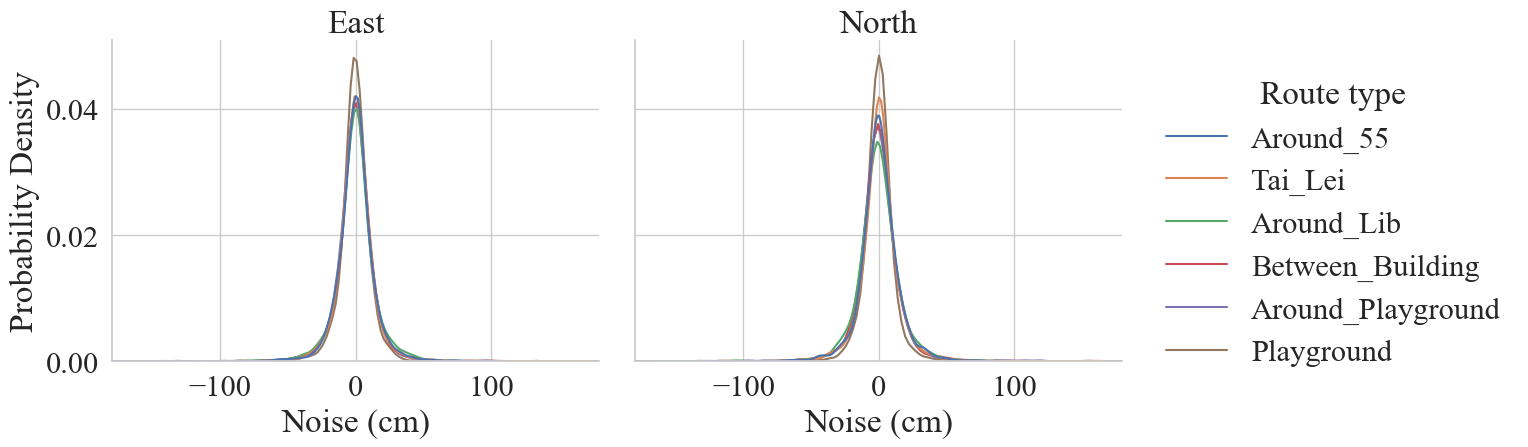

In [9]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)